# Access the labeled extracted feature file and generate the class distribution images

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import math
import csv
from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import seaborn as sns
import plotly
plotly.__version__
import plotly.plotly as py
import plotly.tools as tls
from sklearn import svm
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.cluster import KMeans
import seaborn as sns
plt.rcParams["axes.labelsize"] = 15

/home/avijoy/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#     Citiation: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.2f}; misclass={:0.2f}'.format(accuracy*100, misclass*100))
    plt.show()

## 1. Combine The Feature Files Into One Dataframe

In [3]:
home_url = os.getcwd()
url = os.path.abspath(os.path.join(home_url, '..', 'Extracted Data Files'))
feature_file = ['P1_feature_labeled','P2_feature_labeled','P3_feature_labeled','P4_feature_labeled']

In [4]:
P1_df = pd.read_csv(url + "/" + "P1_feature_labeled.csv")
P2_df = pd.read_csv(url + "/" + "P2_feature_labeled.csv")
P3_df = pd.read_csv(url + "/" + "P3_feature_labeled.csv")
P4_df = pd.read_csv(url + "/" + "P4_feature_labeled.csv")

In [5]:
list(P1_df)

['x_mean',
 'y_mean',
 'z_mean',
 'x_Var',
 'y_Var',
 'z_Var',
 'x_sd',
 'y_sd',
 'z_sd',
 'mean_mag',
 'mag_mean',
 'cov_xy',
 'cov_yz',
 'cov_zx',
 'avg_power',
 'power_spec',
 'Label',
 'User']

In [6]:
def draw_sns_histogram(df):
    sns.set(style="darkgrid", font_scale=2)
    ax = sns.countplot(x="Label", data=df)

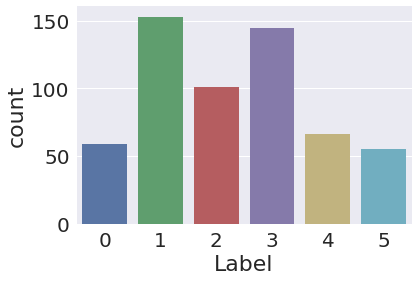

In [7]:
draw_sns_histogram(P1_df)

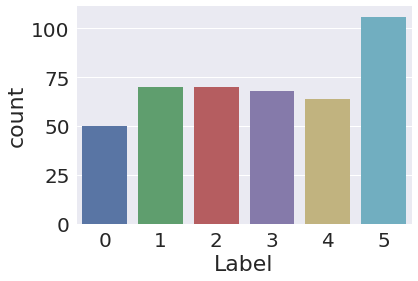

In [8]:
draw_sns_histogram(P2_df)

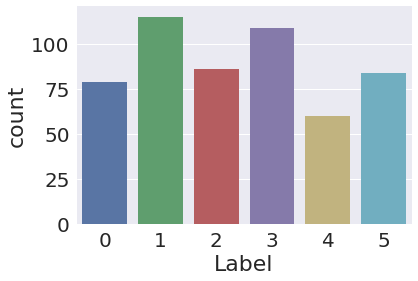

In [9]:
draw_sns_histogram(P3_df)

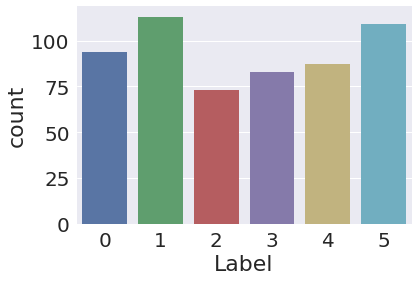

In [10]:
draw_sns_histogram(P4_df)

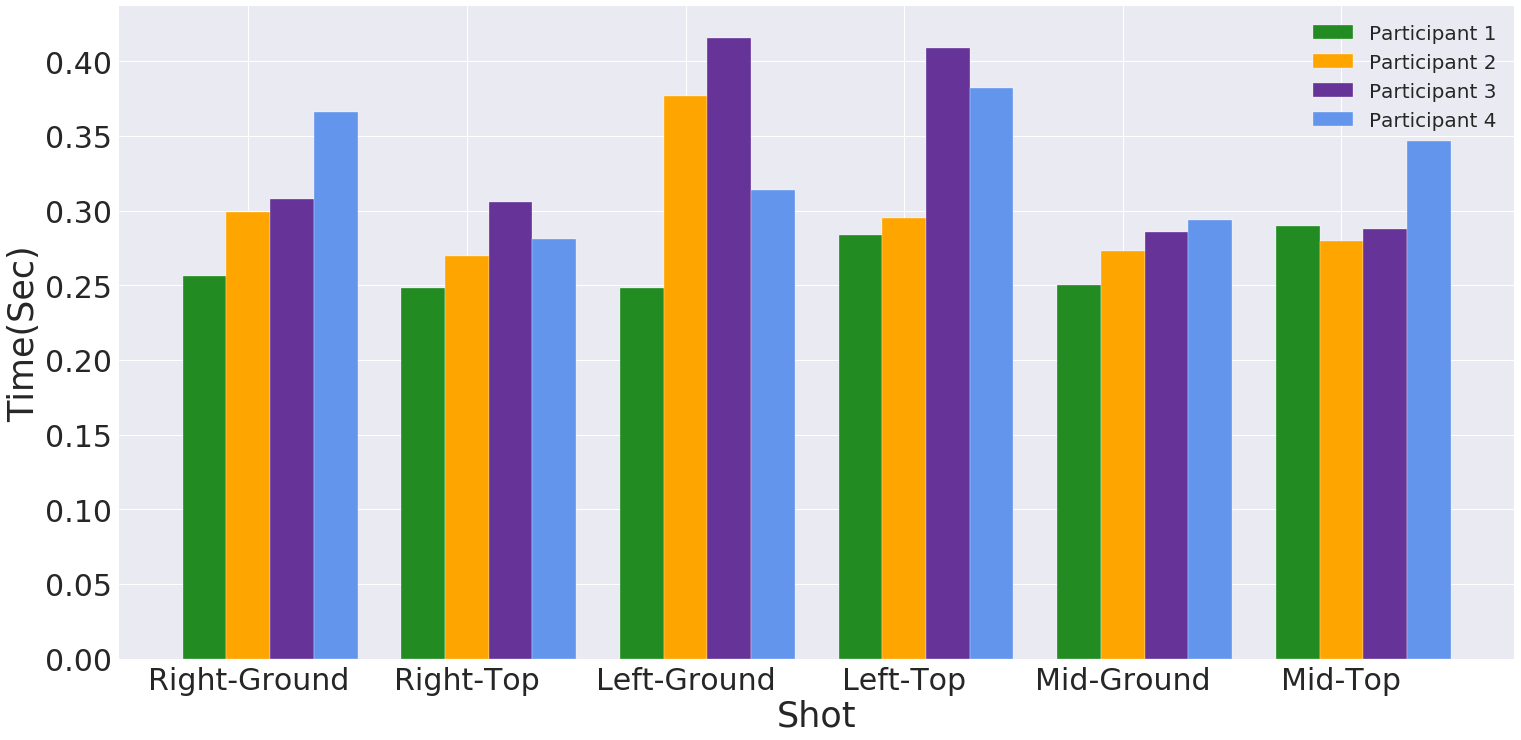

In [11]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.20
 
# set height of bar
bars1 = [0.256, 0.248, 0.248, 0.284, 0.25, 0.29]
bars2 = [0.299, 0.270, 0.377, 0.295, 0.273, 0.28]
bars3 = [0.308, 0.306, 0.416, 0.409, 0.286, 0.288]
bars4 = [0.366, 0.281, 0.314, 0.382, 0.294, 0.347]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
 
# Make the plot


plt.figure(figsize=(25,12))
plt.bar(r1, bars1, color='forestgreen', width=barWidth, edgecolor='white', label='Participant 1')
plt.bar(r2, bars2, color='orange', width=barWidth, edgecolor='white', label='Participant 2')
plt.bar(r3, bars3, color='rebeccapurple', width=barWidth, edgecolor='white', label='Participant 3')
plt.bar(r4, bars4, color='cornflowerblue', width=barWidth, edgecolor='white', label='Participant 4')
 
# Add xticks on the middle of the group bars
plt.xlabel('Shot', fontsize=35)
plt.ylabel('Time(Sec)', fontsize=35)
plt.xticks([r + barWidth for r in range(len(bars1))], ['Right-Ground', 'Right-Top', 'Left-Ground', 'Left-Top', 'Mid-Ground', 'Mid-Top'])

plt.gca().tick_params(axis = 'both', which = 'major', labelsize = 30)
# ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
# Create legend & Show graphic
plt.legend()
plt.show()
